# Initialize sample weights for each training example
## For each iteration:
### Train a weak classifier using the current sample weights
#### Calculate the error of the weak classifier
##### Calculate the weight of the weak classifier based on the error
##### Update the sample weights based on the weak classifier's performance
###### Normalize the sample weights
###### End the iterations
###### Combine the weak classifiers using a weighted majority vote. 


In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [51]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [52]:
print('name of the Features \n', data.feature_names)
print('name of the classes \n', data.target_names)
print('name of the classes \n', data.data.shape)

name of the Features 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
name of the classes 
 ['malignant' 'benign']
name of the classes 
 (569, 30)


In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Logistic Regression Model
log_reg = LogisticRegression()
#AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=40)
actual_iterations = adaboost.n_estimators

print("Number of iterations used by AdaBoost:", actual_iterations)

Number of iterations used by AdaBoost: 50


In [54]:
# Train the classifiers
log_reg.fit(X_train, y_train)
adaboost.fit(X_train, y_train)


C:\Users\Struggler\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier(random_state=40)

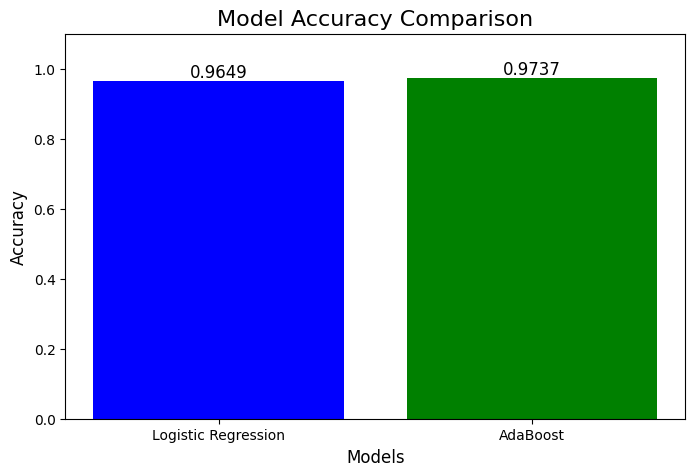

In [55]:
import matplotlib.pyplot as plt
import numpy as np
# Make predictions on the test set
y_pred_1 = adaboost.predict(X_test)
y_pred_2 = log_reg.predict(X_test)
#Let's check the accuracy of both models.
# Calculate the accuracy of the model
accuracy_1 = accuracy_score(y_test, y_pred_2)
accuracy_2 = accuracy_score(y_test, y_pred_1)
# Create a list of model names and their corresponding accuracies
models = ['Logistic Regression', 'AdaBoost']
accuracies = [accuracy_1, accuracy_2]
# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green'])

# Add title and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', fontsize=12)
    
# Display the plot
plt.ylim([0, 1.1])  # Set y-axis limit to fit the accuracy values
plt.show()


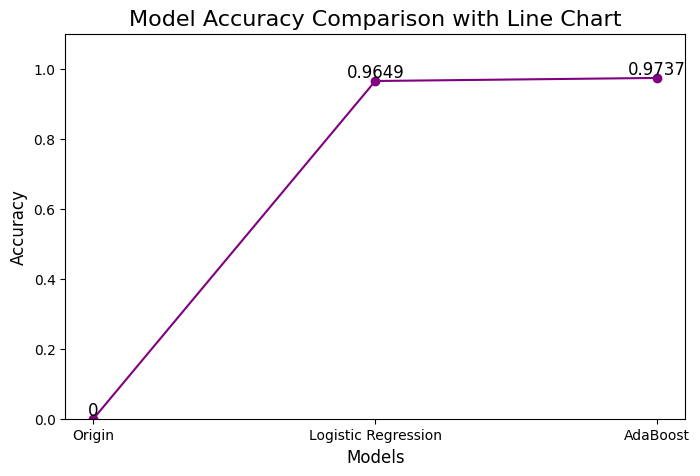

In [56]:
# Model names and accuracies
models = ['Origin', 'Logistic Regression', 'AdaBoost']
accuracies = [0, accuracy_1, accuracy_2]  # Starting from origin (0)

# Plot a line chart
plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='purple')

# Add title and labels
plt.title('Model Accuracy Comparison with Line Chart', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add accuracy values at each point
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, round(accuracy, 4), ha='center', fontsize=12)

# Display the plot
plt.ylim([0, 1.1])  # Set y-axis limit to fit the accuracy values
plt.show()